# 루브릭
|평가문항|상세기준|self check|
|:-------|:-------|:-----------------------|
|1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가?|3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다.|OK|
|2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가?|Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다.|OK|
|3. 딥러닝 모델을 활용해 성능이 비교 및 확인되었는가?|동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다.|OK|

### dataset
1. 케라스에서 제공하는 로이터 뉴스 데이터

### 적용할 알고리즘
1. Multinomial Native Bayes Classifier(나이브 베이즈 분류기)
2. CNB(Completement Naive Bayes Classifier)
3. Logistic Regression - Softmax Regression  
4. LinearSVC(Linear Support Vector Classifier)
5. Decision Tree 
6. Random Foreast
7. GradientBoostingClassifier
8. Voting
<hr/>
9. FFNN(Feed-Forward Neural Network)
10. LSTM(Long Short-Term Memory)

### 분류 성능 평가 지표  
1. Accuracy(정확도)
2. F1-score

## 문제 정의  

> TF-IDF 로 벡터화하기  
> Reuter News category classification


## 분석 결과  

#### 1. Machine Learning

|model|vocab_size|Accuracy|F1|
|:---------:|:----------:|:----------:|:----------:|
|MNB|5000|67.31%|60.12%|
|MNB|10000|65.67% | 57.64%|
|MNB|20000| 61.93%|53.15%|
|CNB| 5000|77.07%| 74.58%| 
|CNB| 10000|77.07%| 74.56%|
|CNB| 20000|76.71%| 73.90%| 
|LogisticRegression| 5000|80.23%| 79.71%|
|LogisticRegression| 10000|81.21%| 80.71%|
|LogisticRegression| 20000|81.34%| 80.85%|
|LinearSVC|5000|76.84%| 76.55%|
|LinearSVC|10000|79.11%| 78.72%|
|LinearSVC|20000|79.20%| 78.81%|
|DecisionTree|5000|61.79%|57.29 %|
|DecisionTree|10000|62.02%|64.29 %|
|DecisionTree|20000|62.11%|57.61 %|
|RandomForest|5000|70.12%|67.70 %|
|RandomForest| 10000|67.40%|83.44 %|
|RandomForest| 20000|67.14%|64.08 %|
|GradientBoostingClassifier| 5000|76.75%|76.62 %|
|GradientBoostingClassifier| 10000|76.62%|76.22 %|
|GradientBoostingClassifier| 20000|77.02%|76.47 %|
|Voting| 5000|81.21%|80.96 %|
|Voting| 10000|81.65%|81,35 %|
|Voting| 20000|81.70%|81.34 %|
|FFNN| 20000|81.03%|-%|
|LSTM| 20000|81.43%|-%|


* vocabulary size 에 따른 accuracy, F1 score
  *  vocab size가 증가 할 수록 나이브 베이즈 분류기(MNB) 의 경우 성능(accuracy, F1)이 좋지 않음.
  * 그 외 나머지는 5000일때 보다는 10000개, 20000만 개일때 accuracy가 좋지만, 10000개인 경우가 F1 이 좋음
* 모델별 성능 
  * Tree 계열 모델인 DecesionTree, Randomforest의 경우, 고차원이여서 그런지 성능이 좋지 않음
  * LogisticRegression 모델이 텍스트 분류같은 영역에서 뛰어난 예측 성능을 보인다고 하는데, 테스트 결과도 voting와 함께 좋게 나옴
  * 그 외 LinearSVC도 비슷한 성능 보임
  
<hr/>
  
#### 2. DeepLearning  
|model|vocab_size|Accuracy|
|:---------:|:----------:|:----------:|
|FFNN| 20000|81.03%|
|LSTM| 20000|81.43%|

* FFNN, LSTM 의 경우 LogisticRegression 와 비슷한 성능 결과가 나옴
* 학습 시간은 LogisticRegression에 비해서 적게 걸렸지만, 성능은 비슷하게 나옴
* FFNN, LSTM 의 경우 layer를 2개 이상 늘리거나, node 수를 증가시키면 성능이 저하됨.

## 분석환경

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Image
#Image(filename='test.jpg') 

In [2]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. 10,000 개 단어만 사용

## 로이터 뉴스 데이터 (1) 데이터 확인하기

### 훈련 데이터와 테스트 데이터 로드하기

* num_words = 10000 : 등장 빈도 횟수 1~10000 에 해당하는 단어만 사용 
* test_split = 0.2 : 80% 훈련 데이터, 20% 테스트 데이터로 사용

In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [4]:
print('훈련 샘플의 수: {}'.format(len(X_train)))
print('테스트 샘플의 수: {}'.format(len(X_test)))
len(np.unique(y_train))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


46

In [5]:
max([max(news) for news in X_train])
max([max(news) for news in X_test])

9999

9999

In [6]:
dir(reuters)
len(reuters.get_word_index())
reuters.get_word_index()

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'get_word_index',
 'load_data']

30979

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [7]:
X_train[0]
X_test[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

[1,
 4,
 1378,
 2025,
 9,
 697,
 4622,
 111,
 8,
 25,
 109,
 29,
 3650,
 11,
 150,
 244,
 364,
 33,
 30,
 30,
 1398,
 333,
 6,
 2,
 159,
 9,
 1084,
 363,
 13,
 2,
 71,
 9,
 2,
 71,
 117,
 4,
 225,
 78,
 206,
 10,
 9,
 1214,
 8,
 4,
 270,
 5,
 2,
 7,
 748,
 48,
 9,
 2,
 7,
 207,
 1451,
 966,
 1864,
 793,
 97,
 133,
 336,
 7,
 4,
 493,
 98,
 273,
 104,
 284,
 25,
 39,
 338,
 22,
 905,
 220,
 3465,
 644,
 59,
 20,
 6,
 119,
 61,
 11,
 15,
 58,
 579,
 26,
 10,
 67,
 7,
 4,
 738,
 98,
 43,
 88,
 333,
 722,
 12,
 20,
 6,
 19,
 746,
 35,
 15,
 10,
 9,
 1214,
 855,
 129,
 783,
 21,
 4,
 2280,
 244,
 364,
 51,
 16,
 299,
 452,
 16,
 515,
 4,
 99,
 29,
 5,
 4,
 364,
 281,
 48,
 10,
 9,
 1214,
 23,
 644,
 47,
 20,
 324,
 27,
 56,
 2,
 2,
 5,
 192,
 510,
 17,
 12]

In [9]:
y_train[0]
y_test[1]

3

10

### 데이터 분포 확인해보기

#### 뉴스 데이터 길이 분포

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


(array([2.292e+03, 2.917e+03, 1.098e+03, 8.240e+02, 4.880e+02, 3.410e+02,
        2.480e+02, 1.640e+02, 1.160e+02, 1.180e+02, 7.600e+01, 5.900e+01,
        6.400e+01, 4.300e+01, 4.700e+01, 2.800e+01, 2.500e+01, 1.500e+01,
        1.000e+01, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  13.  ,   60.26,  107.52,  154.78,  202.04,  249.3 ,  296.56,
         343.82,  391.08,  438.34,  485.6 ,  532.86,  580.12,  627.38,
         674.64,  721.9 ,  769.16,  816.42,  863.68,  910.94,  958.2 ,
        1005.46, 1052.72, 1099.98, 1147.24, 1194.5 , 1241.76, 1289.02,
        1336.28, 1383.54, 1430.8 , 1478.06, 1525.32, 1572.58, 1619.84,
        1667.1 , 1714

Text(0.5, 0, 'length of samples')

Text(0, 0.5, 'number of samples')

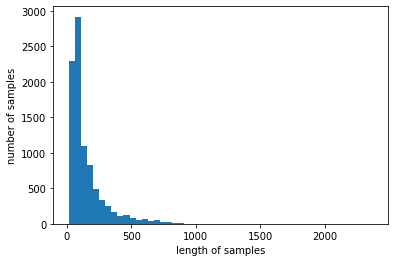

In [10]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in X_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### 뉴스 카테고리 클래스 분포 확인

<AxesSubplot:ylabel='count'>

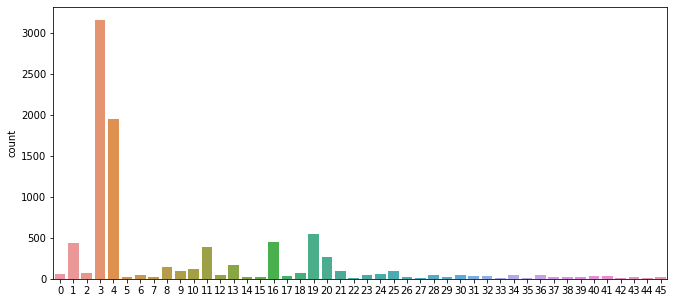

In [11]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [12]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 로이터 뉴스 데이터 (2) 데이터 복원하기

### 원본 뉴스 데이터로 복원해보기

In [13]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
#word_index

In [15]:
word_index['the']
word_index['it']

1

13

In [16]:
# <pad>,<sos>,<unk>
index_to_word = { index+3 : word for word, index in word_index.items() }

In [17]:
#index_to_word[0]
index_to_word[4]
index_to_word[16]

'the'

'it'

In [18]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

#### index_to_word 로 텍스트 복원

In [19]:
' '.join([index_to_word[index] for index in X_train[0]])

'<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

####  index_to_word 로 텍스트 복원

In [20]:
' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]])

'the transaction is expected to be completed'

#### 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환

In [21]:
decoded = []
for i in range(len(X_train)):
    t = ' '.join([index_to_word[index] for index in X_train[i]])
    decoded.append(t)

X_train = decoded
print(len(X_train))

8982


In [22]:
decoded = []
for i in range(len(X_test)):
    t = ' '.join([index_to_word[index] for index in X_test[i]])
    decoded.append(t)

X_test = decoded
print(len(X_test))

2246


#### 제대로 변환이 되었는지 확인

In [23]:
type(X_train), type(y_train)
X_train[:5]
X_test[:5]

(list, numpy.ndarray)

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

## 3. 벡터화 하기

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### DTM 생성

In [25]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(X_train)
print(X_train_dtm.shape)

(8982, 9670)


In [26]:
X_test_dtm = dtmvector.transform(X_test) #테스트 데이터를 DTM으로 변환
print(X_test_dtm.shape)

(2246, 9670)


### TF-IDF Matrix 생성

In [27]:
tfidf_transformer = TfidfTransformer()
tfidfv_train = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv_train.shape)
#tfidfv_train.toarray()

(8982, 9670)


In [28]:
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 9670)


## 4. 다양한 머신러닝 모델 사용

### ML 모델의 라이브러리 불러오기 

In [29]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score


### 1) 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)

In [40]:
# Multinomial Naive Bays Classifier 
mnb = MultinomialNB()

mnb.fit(tfidfv_train, y_train)
mnb_predicted = mnb.predict(tfidfv_test) #테스트 데이터에 대한 예측

print("정확도:", accuracy_score(y_test, mnb_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, mnb_predicted, average='weighted')) #예측값과 실제값 비교

MultinomialNB()

정확도: 0.6567230632235085
f1-score: 0.5764467518778252


### 2) Complement Naive Bayes Classifier(CNB)

In [41]:
# Complemnet Naive Bays Classifier(CNB) 
cnb = ComplementNB()
cnb.fit(tfidfv_train, y_train)

cnb_predicted = cnb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, cnb_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, cnb_predicted, average='weighted')) #예측값과 실제값 비교

ComplementNB()

정확도: 0.7707034728406055
f1-score: 0.7456682614453047


### 3) 로지스틱 회귀(Logistic Regression)

In [42]:
# Logistic Regression
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000, solver='liblinear')
lr.fit(tfidfv_train, y_train)

lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, lr_predicted, average='weighted')) #예측값과 실제값 비교

LogisticRegression(C=10000, max_iter=3000, solver='liblinear')

정확도: 0.8121104185218165
f1-score: 0.8071434296753882


### 4) 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [43]:
# Linear Support Vector Machine
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000000, dual=False)
lsvc.fit(tfidfv_train, y_train)

lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, lsvc_predicted, average='weighted')) #예측값과 실제값 비교

LinearSVC(C=1000, dual=False, max_iter=3000000, penalty='l1')

정확도: 0.7911843276936776
f1-score: 0.7872175451776203


### 5) 결정 트리(Decision Tree)

In [44]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=0)
dt.fit(tfidfv_train, y_train)

dt_predicted = dt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, dt_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, dt_predicted, average='weighted')) #예측값과 실제값 비교

DecisionTreeClassifier(max_depth=10, random_state=0)

정확도: 0.6202137132680321
f1-score: 0.5776398779280149


### 6) 랜덤 포레스트(Random Forest)

In [45]:
# Random Forest 
rc = RandomForestClassifier(n_estimators=5, random_state=0)
rc.fit(tfidfv_train, y_train)

rc_predicted = rc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, rc_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, rc_predicted, average='weighted')) #예측값과 실제값 비교

RandomForestClassifier(n_estimators=5, random_state=0)

정확도: 0.674087266251113
f1-score: 0.6429484177284822


### 7) 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [46]:
# GradientBoostingClassifier
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv_train, y_train)

grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, grbt_predicted, average='weighted')) #예측값과 실제값 비교

GradientBoostingClassifier(random_state=0)

정확도: 0.7662511130899377
f1-score: 0.7622247724249729


### 8) 보팅(Voting)

In [47]:
# VotingClassifier
vc = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2',solver='liblinear')),
        ('cnb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', verbose=3)
vc.fit(tfidfv_train, y_train)

vc_predicted = vc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, vc_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, vc_predicted, average='weighted')) #예측값과 실제값 비교

[Voting] ....................... (1 of 3) Processing lr, total=  11.4s
[Voting] ...................... (2 of 3) Processing cnb, total=   0.0s
[Voting] ..................... (3 of 3) Processing grbt, total=14.1min


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10000, max_iter=3000,
                                                 solver='liblinear')),
                             ('cnb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 verbose=3, voting='soft')

정확도: 0.8165627782724845
f1-score: 0.8135328328742825


# 2. 2,0000 개 단어만 사용

## 로이터 뉴스 데이터 (1) 데이터 확인하기

### 훈련 데이터와 테스트 데이터 로드하기

* num_words = 20000 : 등장 빈도 횟수 1~10000 에 해당하는 단어만 사용 
* test_split = 0.2 : 80% 훈련 데이터, 20% 테스트 데이터로 사용

In [48]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=20000, test_split=0.2)

In [49]:
print('훈련 샘플의 수: {}'.format(len(X_train)))
print('테스트 샘플의 수: {}'.format(len(X_test)))
len(np.unique(y_train))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


46

In [50]:
max([max(news) for news in X_train])
max([max(news) for news in X_test])

19999

19996

### 데이터 분포 확인해보기

#### 뉴스 데이터 길이 분포

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


(array([2.292e+03, 2.917e+03, 1.098e+03, 8.240e+02, 4.880e+02, 3.410e+02,
        2.480e+02, 1.640e+02, 1.160e+02, 1.180e+02, 7.600e+01, 5.900e+01,
        6.400e+01, 4.300e+01, 4.700e+01, 2.800e+01, 2.500e+01, 1.500e+01,
        1.000e+01, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  13.  ,   60.26,  107.52,  154.78,  202.04,  249.3 ,  296.56,
         343.82,  391.08,  438.34,  485.6 ,  532.86,  580.12,  627.38,
         674.64,  721.9 ,  769.16,  816.42,  863.68,  910.94,  958.2 ,
        1005.46, 1052.72, 1099.98, 1147.24, 1194.5 , 1241.76, 1289.02,
        1336.28, 1383.54, 1430.8 , 1478.06, 1525.32, 1572.58, 1619.84,
        1667.1 , 1714

Text(0.5, 0, 'length of samples')

Text(0, 0.5, 'number of samples')

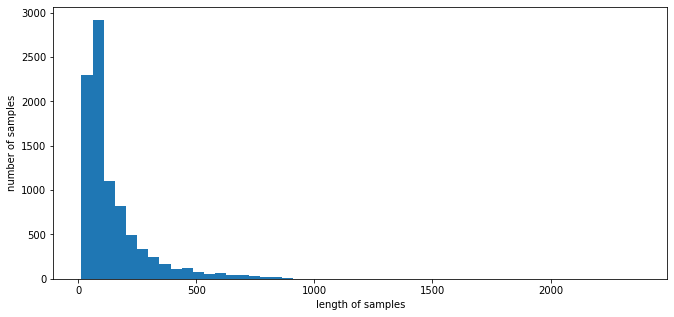

In [54]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in X_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### 뉴스 카테고리 클래스 분포 확인

<AxesSubplot:ylabel='count'>

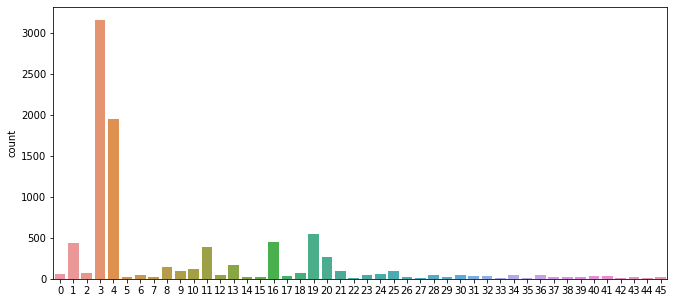

In [55]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [56]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 로이터 뉴스 데이터 (2) 데이터 복원하기

### 원본 뉴스 데이터로 복원해보기

In [57]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
word_index

In [59]:
word_index['the']
word_index['it']

1

13

In [60]:
# <pad>,<sos>,<unk>
index_to_word = { index+3 : word for word, index in word_index.items() }

In [61]:
#index_to_word[0]
index_to_word[4]
index_to_word[16]

'the'

'it'

In [62]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

#### index_to_word 로 텍스트 복원

In [63]:
' '.join([index_to_word[index] for index in X_train[0]])

'<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

####  index_to_word 로 텍스트 복원

In [64]:
' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]])

'the transaction is expected to be completed'

#### 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환

In [65]:
decoded = []
for i in range(len(X_train)):
    t = ' '.join([index_to_word[index] for index in X_train[i]])
    decoded.append(t)

X_train = decoded
print(len(X_train))

8982


In [67]:
decoded = []
for i in range(len(X_test)):
    t = ' '.join([index_to_word[index] for index in X_test[i]])
    decoded.append(t)

X_test = decoded
print(len(X_test))

2246


#### 제대로 변환이 되었는지 확인

In [68]:
type(X_train), type(y_train)
X_train[:5]
X_test[:5]

(list, numpy.ndarray)

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman <unk> yulo said yulo told reuters a survey d

## 3. 벡터화 하기

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### DTM 생성

In [70]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(X_train)
print(X_train_dtm.shape)

(8982, 18479)


In [71]:
X_test_dtm = dtmvector.transform(X_test) #테스트 데이터를 DTM으로 변환
print(X_test_dtm.shape)

(2246, 18479)


### TF-IDF Matrix 생성

In [72]:
tfidf_transformer = TfidfTransformer()
tfidfv_train = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv_train.shape)
#tfidfv_train.toarray()

(8982, 18479)


In [73]:
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 18479)


## 4. 다양한 머신러닝 모델 사용

### ML 모델의 라이브러리 불러오기 

In [74]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score


### 1) 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)

In [75]:
# Multinomial Naive Bays Classifier 
mnb = MultinomialNB()

mnb.fit(tfidfv_train, y_train)
mnb_predicted = mnb.predict(tfidfv_test) #테스트 데이터에 대한 예측

print("정확도:", accuracy_score(y_test, mnb_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, mnb_predicted, average='weighted')) #예측값과 실제값 비교



MultinomialNB()

정확도: 0.6193232413178985
f1-score: 0.5315181088041159


### 2) Complement Naive Bayes Classifier(CNB)

In [76]:
# Complemnet Naive Bays Classifier(CNB) 
cnb = ComplementNB()
cnb.fit(tfidfv_train, y_train)

cnb_predicted = cnb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, cnb_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, cnb_predicted, average='weighted')) #예측값과 실제값 비교

ComplementNB()

정확도: 0.7671415850400712
f1-score: 0.7390612170450325


### 3) 로지스틱 회귀(Logistic Regression)

In [77]:
# Logistic Regression
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000, solver='liblinear')
lr.fit(tfidfv_train, y_train)

lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, lr_predicted, average='weighted')) #예측값과 실제값 비교

LogisticRegression(C=10000, max_iter=3000, solver='liblinear')

정확도: 0.813446126447017
f1-score: 0.8085041295516591


### 4) 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [78]:
# Linear Support Vector Machine
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000000, dual=False)
lsvc.fit(tfidfv_train, y_train)

lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, lsvc_predicted, average='weighted')) #예측값과 실제값 비교

LinearSVC(C=1000, dual=False, max_iter=3000000, penalty='l1')

정확도: 0.7920747996438112
f1-score: 0.788178696552562


### 5) 결정 트리(Decision Tree)

In [79]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=0)
dt.fit(tfidfv_train, y_train)

dt_predicted = dt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, dt_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, dt_predicted, average='weighted')) #예측값과 실제값 비교

DecisionTreeClassifier(max_depth=10, random_state=0)

정확도: 0.6211041852181657
f1-score: 0.576123209915252


### 6) 랜덤 포레스트(Random Forest)

In [80]:
# Random Forest 
rc = RandomForestClassifier(n_estimators=5, random_state=0)
rc.fit(tfidfv_train, y_train)

rc_predicted = rc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, rc_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, rc_predicted, average='weighted')) #예측값과 실제값 비교

RandomForestClassifier(n_estimators=5, random_state=0)

정확도: 0.6714158504007124
f1-score: 0.6408515630206083


### 7) 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [81]:
# GradientBoostingClassifier
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv_train, y_train)

grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, grbt_predicted, average='weighted')) #예측값과 실제값 비교

GradientBoostingClassifier(random_state=0)

정확도: 0.7702582368655387
f1-score: 0.7647126117421563


### 8) 보팅(Voting)

In [82]:
# VotingClassifier
vc = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2',solver='liblinear')),
        ('cnb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', verbose=3)
vc.fit(tfidfv_train, y_train)

vc_predicted = vc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, vc_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, vc_predicted, average='weighted')) #예측값과 실제값 비교

[Voting] ....................... (1 of 3) Processing lr, total=  29.6s
[Voting] ...................... (2 of 3) Processing cnb, total=   0.1s
[Voting] ..................... (3 of 3) Processing grbt, total=14.6min


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10000, max_iter=3000,
                                                 solver='liblinear')),
                             ('cnb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 verbose=3, voting='soft')

정확도: 0.8170080142475512
f1-score: 0.8134808912347363


# 3. 5000 개 단어만 사용

## 로이터 뉴스 데이터 (1) 데이터 확인하기

### 훈련 데이터와 테스트 데이터 로드하기

* num_words = 5000 : 등장 빈도 횟수 1~5000 에 해당하는 단어만 사용 
* test_split = 0.2 : 80% 훈련 데이터, 20% 테스트 데이터로 사용

In [106]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [107]:
print('훈련 샘플의 수: {}'.format(len(X_train)))
print('테스트 샘플의 수: {}'.format(len(X_test)))
len(np.unique(y_train))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


46

In [108]:
max([max(news) for news in X_train])
max([max(news) for news in X_test])

4999

4999

### 데이터 분포 확인해보기

#### 뉴스 데이터 길이 분포

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


(array([2.292e+03, 2.917e+03, 1.098e+03, 8.240e+02, 4.880e+02, 3.410e+02,
        2.480e+02, 1.640e+02, 1.160e+02, 1.180e+02, 7.600e+01, 5.900e+01,
        6.400e+01, 4.300e+01, 4.700e+01, 2.800e+01, 2.500e+01, 1.500e+01,
        1.000e+01, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  13.  ,   60.26,  107.52,  154.78,  202.04,  249.3 ,  296.56,
         343.82,  391.08,  438.34,  485.6 ,  532.86,  580.12,  627.38,
         674.64,  721.9 ,  769.16,  816.42,  863.68,  910.94,  958.2 ,
        1005.46, 1052.72, 1099.98, 1147.24, 1194.5 , 1241.76, 1289.02,
        1336.28, 1383.54, 1430.8 , 1478.06, 1525.32, 1572.58, 1619.84,
        1667.1 , 1714

Text(0.5, 0, 'length of samples')

Text(0, 0.5, 'number of samples')

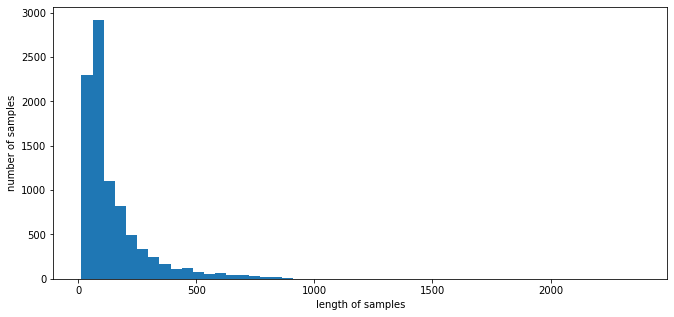

In [113]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in X_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### 뉴스 카테고리 클래스 분포 확인

<AxesSubplot:ylabel='count'>

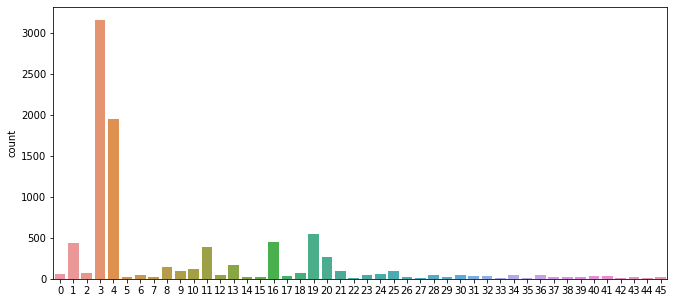

In [114]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [115]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 로이터 뉴스 데이터 (2) 데이터 복원하기

### 원본 뉴스 데이터로 복원해보기

In [116]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
#word_index

In [118]:
word_index['the']
word_index['it']

1

13

In [119]:
# <pad>,<sos>,<unk>
index_to_word = { index+3 : word for word, index in word_index.items() }

In [120]:
#index_to_word[0]
index_to_word[4]
index_to_word[16]

'the'

'it'

In [121]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

#### index_to_word 로 텍스트 복원

In [122]:
' '.join([index_to_word[index] for index in X_train[0]])

'<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

####  index_to_word 로 텍스트 복원

In [123]:
' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]])

'the transaction is expected to be completed'

#### 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환

In [124]:
decoded = []
for i in range(len(X_train)):
    t = ' '.join([index_to_word[index] for index in X_train[i]])
    decoded.append(t)

X_train = decoded
print(len(X_train))

8982


In [125]:
decoded = []
for i in range(len(X_test)):
    t = ' '.join([index_to_word[index] for index in X_test[i]])
    decoded.append(t)

X_test = decoded
print(len(X_test))

2246


#### 제대로 변환이 되었는지 확인

In [126]:
type(X_train), type(y_train)
X_train[:5]
X_test[:5]

(list, numpy.ndarray)

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> <unk> and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> <unk> said <unk> told reuters a survey during the curr

## 3. 벡터화 하기

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### DTM 생성

In [128]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(X_train)
print(X_train_dtm.shape)

(8982, 4867)


In [129]:
X_test_dtm = dtmvector.transform(X_test) #테스트 데이터를 DTM으로 변환
print(X_test_dtm.shape)

(2246, 4867)


### TF-IDF Matrix 생성

In [130]:
tfidf_transformer = TfidfTransformer()
tfidfv_train = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv_train.shape)
#tfidfv_train.toarray()

(8982, 4867)


In [131]:
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 4867)


## 4. 다양한 머신러닝 모델 사용

### ML 모델의 라이브러리 불러오기 

In [132]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score


### 1) 나이브 베이즈 분류기(Multinomial Naive Bayes Classifier)

In [133]:
# Multinomial Naive Bays Classifier 
mnb = MultinomialNB()

mnb.fit(tfidfv_train, y_train)
mnb_predicted = mnb.predict(tfidfv_test) #테스트 데이터에 대한 예측

print("정확도:", accuracy_score(y_test, mnb_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, mnb_predicted, average='weighted')) #예측값과 실제값 비교


MultinomialNB()

정확도: 0.6731967943009796
f1-score: 0.6012501291711391


### 2) Complement Naive Bayes Classifier(CNB)

In [134]:
# Complemnet Naive Bays Classifier(CNB) 
cnb = ComplementNB()
cnb.fit(tfidfv_train, y_train)

cnb_predicted = cnb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, cnb_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, cnb_predicted, average='weighted')) #예측값과 실제값 비교

ComplementNB()

정확도: 0.7707034728406055
f1-score: 0.7458990404916549


### 3) 로지스틱 회귀(Logistic Regression)

In [135]:
# Logistic Regression
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000, solver='liblinear')
lr.fit(tfidfv_train, y_train)

lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, lr_predicted, average='weighted')) #예측값과 실제값 비교

LogisticRegression(C=10000, max_iter=3000, solver='liblinear')

정확도: 0.8023152270703473
f1-score: 0.7971967418199032


### 4) 선형 서포트 벡터 머신(Linear Support Vector Machine)

In [136]:
# Linear Support Vector Machine
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000000, dual=False)
lsvc.fit(tfidfv_train, y_train)

lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, lsvc_predicted, average='weighted')) #예측값과 실제값 비교

LinearSVC(C=1000, dual=False, max_iter=3000000, penalty='l1')

정확도: 0.7684772929652716
f1-score: 0.7655352346688458


### 5) 결정 트리(Decision Tree)

In [137]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=0)
dt.fit(tfidfv_train, y_train)

dt_predicted = dt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, dt_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, dt_predicted, average='weighted')) #예측값과 실제값 비교

DecisionTreeClassifier(max_depth=10, random_state=0)

정확도: 0.6179875333926982
f1-score: 0.5729970881280324


### 6) 랜덤 포레스트(Random Forest)

In [138]:
# Random Forest 
rc = RandomForestClassifier(n_estimators=5, random_state=0)
rc.fit(tfidfv_train, y_train)

rc_predicted = rc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, rc_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, rc_predicted, average='weighted')) #예측값과 실제값 비교

RandomForestClassifier(n_estimators=5, random_state=0)

정확도: 0.701246660730187
f1-score: 0.6770217603524399


### 7) 그래디언트 부스팅 트리(GradientBoostingClassifier)

In [139]:
# GradientBoostingClassifier
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv_train, y_train)

grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, grbt_predicted, average='weighted')) #예측값과 실제값 비교

GradientBoostingClassifier(random_state=0)

정확도: 0.767586821015138
f1-score: 0.7662475269931749


### 8) 보팅(Voting)

In [140]:
# VotingClassifier
vc = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2',solver='liblinear')),
        ('cnb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', verbose=3)
vc.fit(tfidfv_train, y_train)

vc_predicted = vc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, vc_predicted)) #예측값과 실제값 비교
print("f1-score:", f1_score(y_test, vc_predicted, average='weighted')) #예측값과 실제값 비교

[Voting] ....................... (1 of 3) Processing lr, total=  11.6s
[Voting] ...................... (2 of 3) Processing cnb, total=   0.0s
[Voting] ..................... (3 of 3) Processing grbt, total=13.5min


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10000, max_iter=3000,
                                                 solver='liblinear')),
                             ('cnb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 verbose=3, voting='soft')

정확도: 0.8121104185218165
f1-score: 0.8096307368781038


# 4. 딥러닝 모델 

## 로이터 뉴스 데이터 (1) 데이터 확인하기

### 훈련 데이터와 테스트 데이터 로드하기

* num_words = 20000 : 등장 빈도 횟수 1~10000 에 해당하는 단어만 사용 
* test_split = 0.2 : 80% 훈련 데이터, 20% 테스트 데이터로 사용

In [135]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=20000, test_split=0.2)

print('훈련용 뉴스 기사 : {}'.format(len(X_train)))
print('테스트용 뉴스 기사 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 : 46


In [136]:
print('첫번째 훈련용 뉴스 기사 :',X_train[0])
print('첫번째 훈련용 뉴스 기사의 레이블 :',y_train[0])

첫번째 훈련용 뉴스 기사 : [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
첫번째 훈련용 뉴스 기사의 레이블 : 3


In [137]:
max([max(news) for news in X_train])
max([max(news) for news in X_test])

19999

19996

In [138]:
dir(reuters)
len(reuters.get_word_index())
#reuters.get_word_index()

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'get_word_index',
 'load_data']

30979

## 로이터 뉴스 데이터 (2) 데이터 복원하기

### 원본 뉴스 데이터로 복원해보기

In [139]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
#word_index

In [140]:
# <pad>,<sos>,<unk>
index_to_word = { index+3 : word for word, index in word_index.items() }

In [141]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

#### index_to_word 로 텍스트 복원

In [142]:
' '.join([index_to_word[index] for index in X_train[0]])

'<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

#### index_to_word 로 텍스트 복원

In [143]:
' '.join([index_to_word[index] for index in [4, 587, 23, 133, 6, 30, 515]])

'the transaction is expected to be completed'

#### 훈련용 뉴스 데이터와 전체 테스트용 뉴스 데이터를 텍스트 데이터로 변환

In [144]:
decoded = []
for i in range(len(X_train)):
    t = ' '.join([index_to_word[index] for index in X_train[i]])
    decoded.append(t)

X_train = decoded
print(len(X_train))

8982


In [145]:
decoded = []
for i in range(len(X_test)):
    t = ' '.join([index_to_word[index] for index in X_test[i]])
    decoded.append(t)

X_test = decoded
print(len(X_test))

2246


#### 제대로 변환이 되었는지 확인

In [146]:
type(X_train), type(y_train)
X_train[:5]
X_test[:5]

(list, numpy.ndarray)

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman <unk> yulo said yulo told reuters a survey d

## 3. 벡터화 하기

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

### DTM 생성

In [148]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(X_train)
print(X_train_dtm.shape)

(8982, 18479)


In [149]:
X_test_dtm = dtmvector.transform(X_test) #테스트 데이터를 DTM으로 변환
print(X_test_dtm.shape)

(2246, 18479)


### TF-IDF Matrix 생성

In [150]:
tfidf_transformer = TfidfTransformer()
tfidfv_train = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv_train.shape)
#tfidfv_train.toarray()

(8982, 18479)


In [151]:
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 18479)


In [152]:
type(tfidfv_train.toarray())
type(tfidfv_train.todense())

numpy.ndarray

numpy.matrix

## 4. 딥러닝 모델 사용

### 라이브러리 불러오기 

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, InputLayer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

### 1) FFNN 모델

In [123]:
X_train = tfidfv_train.toarray()
X_test = tfidfv_test.toarray()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

(8982, 18479)

(2246, 18479)

(8982, 46)

(2246, 46)

#### validation set 구성

In [127]:
print(X_train.shape[0])
print(int(X_train.shape[0] * 0.2))
print(X_train.shape[0] - int(X_train.shape[0] * 0.2))

8982
1796
7186


In [128]:
# validation set 28848건 분리
x_val = X_train[:1796]   
y_val = y_train[:1796]

# validation set을 제외한 나머지 115394건
partial_x_train = X_train[1796:]  
partial_y_train = y_train[1796:]

print(x_val.shape)
print(partial_x_train.shape)

(1796, 18479)
(7186, 18479)


#### 모델 설계

In [129]:
model = Sequential([
    Dense(64,activation="relu",input_dim=18479),
#    Dense(64, activation="relu"),
    Dense(46, activation="softmax")
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 64)                1182720   
_________________________________________________________________
dense_24 (Dense)             (None, 46)                2990      
Total params: 1,185,710
Trainable params: 1,185,710
Non-trainable params: 0
_________________________________________________________________


In [130]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [131]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
57/57 [==============================] - 1s 15ms/step - loss: 3.0365 - accuracy: 0.3575 - val_loss: 2.3039 - val_accuracy: 0.3914
Epoch 2/20
57/57 [==============================] - 0s 7ms/step - loss: 1.9093 - accuracy: 0.5437 - val_loss: 1.7227 - val_accuracy: 0.6169
Epoch 3/20
57/57 [==============================] - 0s 7ms/step - loss: 1.4799 - accuracy: 0.6762 - val_loss: 1.4540 - val_accuracy: 0.6732
Epoch 4/20
57/57 [==============================] - 0s 7ms/step - loss: 1.2304 - accuracy: 0.7274 - val_loss: 1.2904 - val_accuracy: 0.7121
Epoch 5/20
57/57 [==============================] - 0s 7ms/step - loss: 1.0550 - accuracy: 0.7721 - val_loss: 1.1779 - val_accuracy: 0.7400
Epoch 6/20
57/57 [==============================] - 0s 7ms/step - loss: 0.9212 - accuracy: 0.8043 - val_loss: 1.0923 - val_accuracy: 0.7578
Epoch 7/20
57/57 [==============================] - 0s 7ms/step - loss: 0.8122 - accuracy: 0.8259 - val_loss: 1.0262 - val_accuracy: 0.7728
Epoch 8/20
57/57 [=

In [132]:
results = model.evaluate(X_test, y_test, verbose=2)
results

71/71 - 0s - loss: 0.7969 - accuracy: 0.8103


[0.7968963384628296, 0.8103294968605042]

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

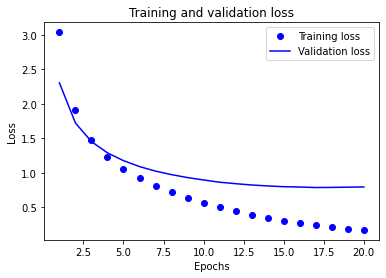

In [133]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

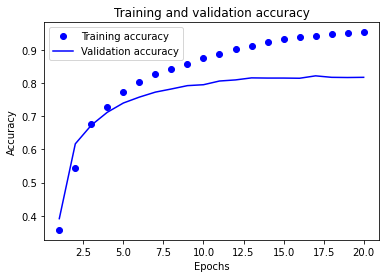

In [134]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 2) LSTM 모델

In [153]:
X_train = tfidfv_train.toarray()
X_test = tfidfv_test.toarray()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

X_train.shape
X_test.shape
y_train.shape
y_test.shape

(8982, 18479)

(2246, 18479)

(8982, 46)

(2246, 46)

(8982, 1, 18479)

(2246, 1, 18479)

(8982, 46)

(2246, 46)

#### validation set 구성

In [154]:
print(X_train.shape[0])
print(int(X_train.shape[0] * 0.2))
print(X_train.shape[0] - int(X_train.shape[0] * 0.2))

8982
1796
7186


In [156]:
# validation set 28848건 분리
x_val = X_train[:1796]   
y_val = y_train[:1796]

# validation set을 제외한 나머지 115394건
partial_x_train = X_train[1796:]  
partial_y_train = y_train[1796:]

print(x_val.shape)
print(partial_x_train.shape)

(1796, 1, 18479)
(7186, 1, 18479)


#### 모델 설계

In [195]:
model = Sequential([
    LSTM(64, input_dim=18479, activation='relu',dropout=0.25,recurrent_dropout=0.25),
#    LSTM(64, input_dim=18479,activation='relu'),
    Dense(46, activation="softmax")
])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 64)                4747264   
_________________________________________________________________
dense_35 (Dense)             (None, 46)                2990      
Total params: 4,750,254
Trainable params: 4,750,254
Non-trainable params: 0
_________________________________________________________________


In [196]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [197]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
113/113 [==============================] - 4s 16ms/step - loss: 3.1626 - accuracy: 0.5274 - val_loss: 2.3852 - val_accuracy: 0.5284
Epoch 2/20
113/113 [==============================] - 1s 11ms/step - loss: 1.9805 - accuracy: 0.5465 - val_loss: 1.7477 - val_accuracy: 0.5791
Epoch 3/20
113/113 [==============================] - 1s 11ms/step - loss: 1.5327 - accuracy: 0.6599 - val_loss: 1.4711 - val_accuracy: 0.6720
Epoch 4/20
113/113 [==============================] - 1s 11ms/step - loss: 1.2994 - accuracy: 0.7092 - val_loss: 1.3103 - val_accuracy: 0.7010
Epoch 5/20
113/113 [==============================] - 1s 11ms/step - loss: 1.1301 - accuracy: 0.7463 - val_loss: 1.1928 - val_accuracy: 0.7344
Epoch 6/20
113/113 [==============================] - 1s 11ms/step - loss: 0.9959 - accuracy: 0.7837 - val_loss: 1.1111 - val_accuracy: 0.7584
Epoch 7/20
113/113 [==============================] - 1s 11ms/step - loss: 0.8945 - accuracy: 0.8114 - val_loss: 1.0395 - val_accuracy: 0.7734

In [199]:
results = model.evaluate(X_test, y_test, verbose=2)
results

71/71 - 0s - loss: 0.7967 - accuracy: 0.8143


[0.7966907620429993, 0.8143365979194641]

Text(0.5, 1.0, 'Training and validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

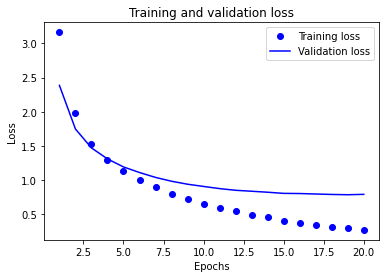

In [202]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training and validation accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

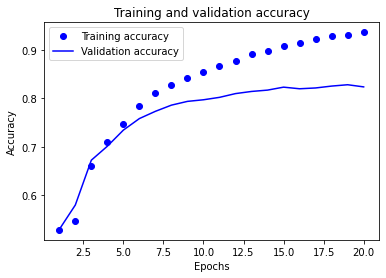

In [203]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## 회고


#### 1. Machine Learning

|model|vocab_size|Accuracy|F1|
|:---------:|:----------:|:----------:|:----------:|
|MNB|5000|67.31%|60.12%|
|MNB|10000|65.67% | 57.64%|
|MNB|20000| 61.93%|53.15%|
|CNB| 5000|77.07%| 74.58%| 
|CNB| 10000|77.07%| 74.56%|
|CNB| 20000|76.71%| 73.90%| 
|LogisticRegression| 5000|80.23%| 79.71%|
|LogisticRegression| 10000|81.21%| 80.71%|
|LogisticRegression| 20000|81.34%| 80.85%|
|LinearSVC|5000|76.84%| 76.55%|
|LinearSVC|10000|79.11%| 78.72%|
|LinearSVC|20000|79.20%| 78.81%|
|DecisionTree|5000|61.79%|57.29 %|
|DecisionTree|10000|62.02%|64.29 %|
|DecisionTree|20000|62.11%|57.61 %|
|RandomForest|5000|70.12%|67.70 %|
|RandomForest| 10000|67.40%|83.44 %|
|RandomForest| 20000|67.14%|64.08 %|
|GradientBoostingClassifier| 5000|76.75%|76.62 %|
|GradientBoostingClassifier| 10000|76.62%|76.22 %|
|GradientBoostingClassifier| 20000|77.02%|76.47 %|
|Voting| 5000|81.21%|80.96 %|
|Voting| 10000|81.65%|81,35 %|
|Voting| 20000|81.70%|81.34 %|
|FFNN| 20000|81.03%|-%|
|LSTM| 20000|81.43%|-%|


* vocabulary size 에 따른 accuracy, F1 score
  *  vocab size가 증가 할 수록 나이브 베이즈 분류기(MNB) 의 경우 성능(accuracy, F1)이 좋지 않음.
  * 그 외 나머지는 5000일때 보다는 10000개, 20000만 개일때 accuracy가 좋지만, 10000개인 경우가 F1 이 좋음
* 모델별 성능 
  * Tree 계열 모델인 DecesionTree, Randomforest의 경우, 고차원이여서 그런지 성능이 좋지 않음
  * LogisticRegression 모델이 텍스트 분류같은 영역에서 뛰어난 예측 성능을 보인다고 하는데, 테스트 결과도 voting와 함께 좋게 나옴
  * 그 외 LinearSVC도 비슷한 성능 보임
  
<hr/>
  
#### 2. DeepLearning  
|model|vocab_size|Accuracy|
|:---------:|:----------:|:----------:|
|FFNN| 20000|81.03%|
|LSTM| 20000|81.43%|

* FFNN, LSTM 의 경우 LogisticRegression 와 비슷한 성능 결과가 나옴
* 학습 시간은 LogisticRegression에 비해서 적게 걸렸지만, 성능은 비슷하게 나옴
* FFNN, LSTM 의 경우 layer를 2개 이상 늘리거나, node 수를 증가시키면 성능이 저하됨.

## 참고 문헌 

* 케라스 창시자에게 배우는 딥러닝